# Respostas do desafio do Kaggle 2020
### Perfil de pessoas profissionais de dados no mundo

[**Dataset**](https://www.kaggle.com/c/kaggle-survey-2020)



In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.2 MB/s 
     |████████████████████████████████| 6.3 MB 54.1 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
!pip install geoplot

     |████████████████████████████████| 10.8 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 24.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 55.7 MB/s 
     |████████████████████████████████| 219 kB 57.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516254 sha256=ed7f7d78e2efec3032cfda3c643e80287c954d7effd907c2e26ce14961bd2b92
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=f05039eefc2bb6b8291b908f3883a47cc75dc98e2c39e92923135dd1e378a5d8
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully bui

In [ ]:
!pip install pycountry 

     |████████████████████████████████| 10.1 MB 4.0 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=3f1a0a5fe51656fcd6215252afa6b272597b883cb7d608525a1efe94042200f6
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
#@title
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import geoplot
import pycountry 
import warnings
import itertools
from scipy import stats
from google.colab import drive
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

In [ ]:
#@title
# ignorando os avisos 
warnings.filterwarnings('ignore')

In [ ]:
#@title
# conectando ao drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
# carregando o arquivo 
df = pd.read_csv('/content/drive/My Drive/kaggle_survey_2020_responses.csv', sep=',')
questions = df.iloc[0, :].T
df = df.iloc[1:, :]

# visualizando as primeiras linhas do df
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title
number = df.shape[0]
print(f'Amostra: {number}')

Amostra: 20036


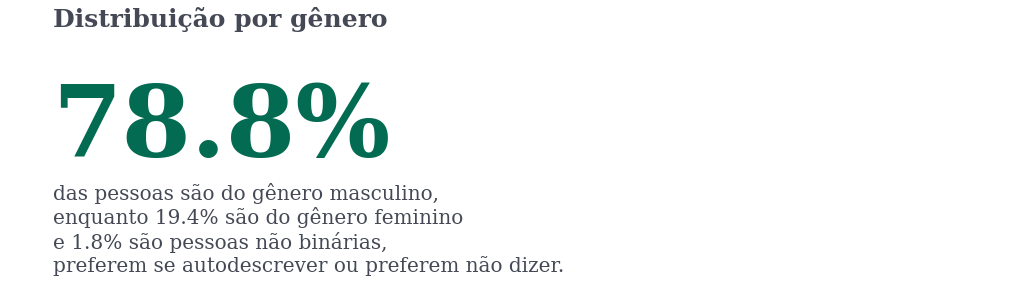

In [ ]:
#@title
# dados
x = df.groupby(['Q2'])['Q2'].count()
y = len(df)
r = (x/y)

df_gender = pd.DataFrame(r).T

man = round(df_gender['Man'] * 100,1) 
woman = round(df_gender['Woman'] * 100,1)
others = round((df_gender['Nonbinary'] + df_gender['Prefer not to say'] + df_gender['Prefer to self-describe']) * 100,1)

# visualização
fig, ax = plt.subplots(1,1, figsize=(18, 4))
fig.text(0.16,0.6, str(man[0])+'%', fontweight='bold', fontfamily='serif', fontsize=100, color='#036b52')
fig.text(0.16,0.2, 'das pessoas são do gênero masculino,\nenquanto '+ str(woman[0])+'% são do gênero feminino\ne '+ str(others[0])+'% são pessoas não binárias,\npreferem se autodescrever ou preferem não dizer.',
         fontweight='light', fontfamily='serif', fontsize=20, color='#444955')

# outras configurações 
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([]) 
fig.text(0.16,1.05,'Distribuição por gênero', fontfamily='serif',fontsize=25, fontweight='bold', color='#444955')

# plotando a visualização
plt.show()

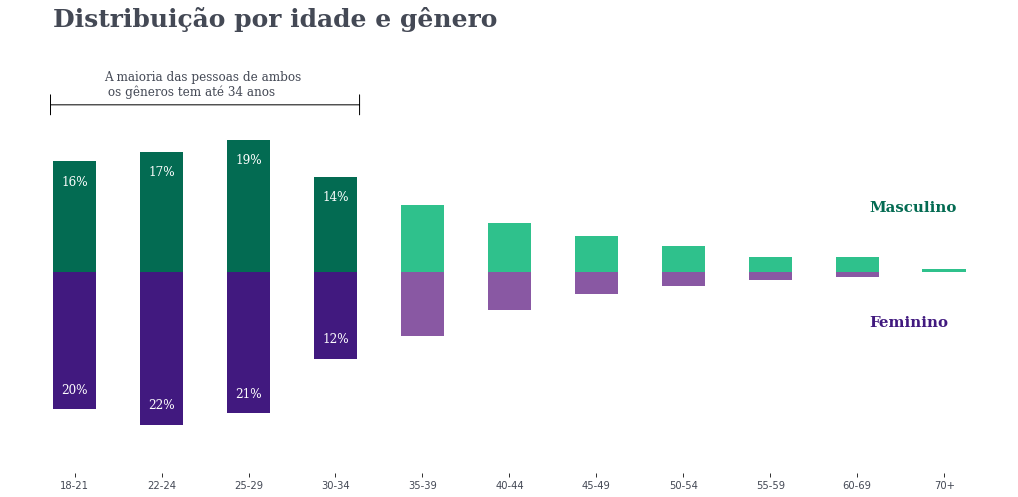

In [ ]:
#@title
# dados
age_gender = df.groupby('Q1')['Q2'].value_counts().unstack().sort_index().fillna(0).astype(int)

man = age_gender['Man'] / len(df[df['Q2'] == 'Man']) * 100
woman = -age_gender['Woman'] / len(df[df['Q2'] == 'Woman']) * 100

# gráfico
fig, ax = plt.subplots(1,1, figsize=(18, 8))
ax.bar(man.index, man, width=0.5, label='Masculino',
       color=['#036b52','#036b52','#036b52','#036b52',
              '#2fc18c','#2fc18c','#2fc18c','#2fc18c',
              '#2fc18c','#2fc18c','#2fc18c'])
ax.bar(woman.index, woman, width=0.5, label='Feminino',
       color=['#41197f','#41197f','#41197f','#41197f',
              '#8958a3','#8958a3','#8958a3','#8958a3',
              '#8958a3','#8958a3','#8958a3'])

# anotações
for i in woman.index[:4]:
    ax.annotate(f"{str(int(man[i]))+'%'}", 
                   xy=(i, man[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='white', fontsize=12)   

for i in man.index[:4]:
    ax.annotate(f"{str(int(-woman[i]))+'%'}", 
                   xy=(i, woman[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='white', fontsize=12)
    
# outras configurações do gráfico
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_ylim(-30, 35)    
ax.set_yticks([]) 
ax.set_xticklabels(age_gender.index, color='#444955')
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Distribuição por idade e gênero', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
fig.text(0.790,0.58,"Masculino", fontweight="bold", fontfamily='serif', fontsize=15, color='#036b52')
fig.text(0.790,0.38,"Feminino", fontweight="bold", fontfamily='serif', fontsize=15, color='#41197f')
fig.text(0.200,0.78,"A maioria das pessoas de ambos\n os gêneros tem até 34 anos", fontweight="light", fontfamily='serif', fontsize=12, color='#444955')
ax.annotate('', xy=(3.3, 25), xytext=(-0.3, 25), arrowprops={'arrowstyle': '|-|'}, color='#444955')

# plotando o gráfico
plt.show()

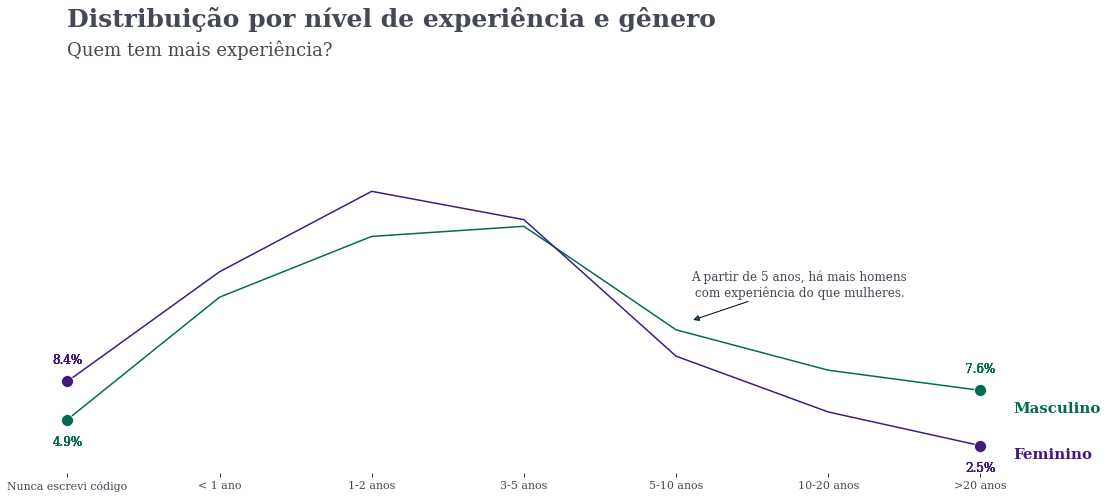

In [ ]:
#@title
# dados
order_dict = {'I have never written code':0, '< 1 years':1, '1-2 years':2, '3-5 years':3,
         '5-10 years':4, '10-20 years':5, '20+ years':6}

experience_gender = df.groupby('Q6')['Q2'].value_counts().unstack().sort_index().fillna(0).astype(int) 
experience_gender = pd.DataFrame(experience_gender, index=sorted(order_dict, key=order_dict.get))

man = experience_gender['Man'] / len(df[df['Q2'] == 'Man']) * 100
woman = experience_gender['Woman'] / len(df[df['Q2'] == 'Woman']) * 100

# gráfico
fig, ax = plt.subplots(1,1, figsize=(18, 8))
sns.lineplot(man.index, man, color='#036b52', label='Masculino',
             marker='o', ms=12, markevery=[0,6])
sns.lineplot(woman.index, woman, color='#41197f',label='Feminino',
             marker='o', ms=12, markevery=[0,6])

# anotações
for i in man.index:
    ax.annotate(f"{str(round(man[0],1))+'%'}", 
                   xy=(0, man[0] - 2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#036b52', fontsize=12)  
    
    ax.annotate(f"{str(round(man[6],1))+'%'}", 
                   xy=(6, man[6] + 2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#036b52', fontsize=12)   

for i in woman.index:
    ax.annotate(f"{str(round(woman[0],1))+'%'}", 
                   xy=(0, woman[0] + 2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#41197f', fontsize=12)
    
    ax.annotate(f"{str(round(woman[6],1))+'%'}", 
                   xy=(6, woman[6] - 2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#41197f', fontsize=12)

# outras configurações do gráfico
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 40)  
ax.set_ylabel('') 
ax.set_xticklabels(['Nunca escrevi código','< 1 ano', '1-2 anos', '3-5 anos',
         '5-10 anos', '10-20 anos', '>20 anos'], fontfamily='serif', fontsize=11, color='#444955')
ax.set_yticks([]) 
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Distribuição por nível de experiência e gênero', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
fig.text(0.16, 0.85, 'Quem tem mais experiência?', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')
fig.text(0.890,0.23,"Masculino", fontweight="bold", fontfamily='serif', fontsize=15, color='#036b52')
fig.text(0.890,0.15,"Feminino", fontweight="bold", fontfamily='serif', fontsize=15, color='#41197f')
ax.annotate("A partir de 5 anos, há mais homens\n com experiência do que mulheres.",
             horizontalalignment = 'left', verticalalignment = 'bottom',
             xy = (4.1,14), xytext=(4.1,16), fontfamily='serif', fontsize=12,
            arrowprops = dict(arrowstyle='-|>'), color='#444955')

# plotando o gráfico
plt.show()

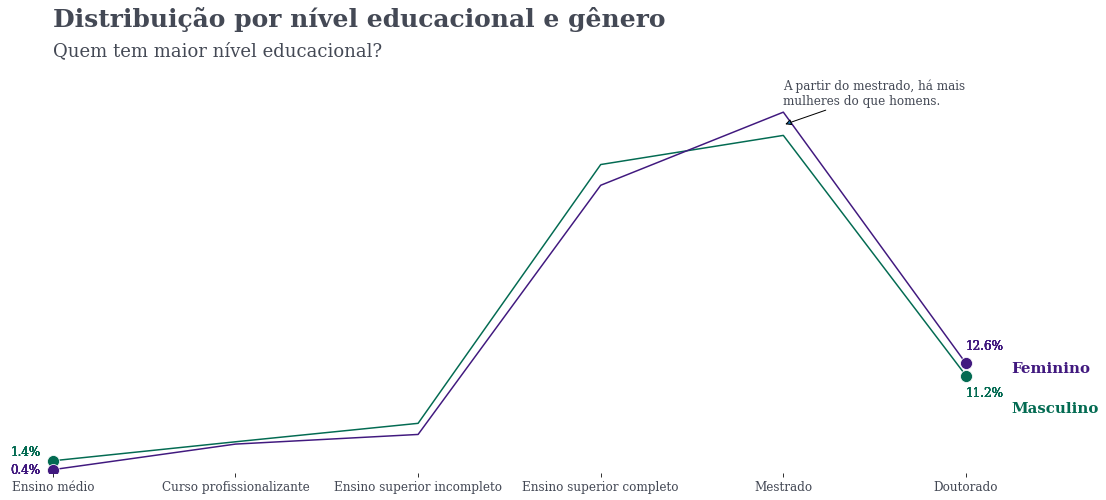

In [ ]:
#@title
# dados
education_order = {'No formal education past high school':0, 'Professional degree':1,
              'Some college/university study without earning a bachelor’s degree':2,
              'Bachelor’s degree':3, 'Master’s degree':4, 'Doctoral degree':5}

education_gender = df.groupby('Q4')['Q2'].value_counts().unstack().sort_index().fillna(0).astype(int) 
education_gender = pd.DataFrame(education_gender, index=sorted(education_order, key=education_order.get))

man = education_gender['Man'] / len(df[df['Q2'] == 'Man']) * 100
woman = education_gender['Woman'] / len(df[df['Q2'] == 'Woman']) * 100

# gráfico
fig, ax = plt.subplots(1,1, figsize=(18, 8))
sns.lineplot(man.index, man, color='#036b52', label='Masculino',
             marker='o', ms=12, markevery=[0,5])
sns.lineplot(woman.index, woman, color='#41197f',label='Feminino',
             marker='o', ms=12, markevery=[0,5])

# anotações
for i in man.index:
    ax.annotate(f"{str(round(man[0],1))+'%'}", 
                   xy=(-0.15, man[0] + 1),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#036b52', fontsize=12)  
    
    ax.annotate(f"{str(round(man[5],1))+'%'}", 
                   xy=(5.1, man[5] - 2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#036b52', fontsize=12)   

for i in woman.index:
    ax.annotate(f"{str(round(woman[0],1))+'%'}", 
                   xy=(-0.15, woman[0]),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#41197f', fontsize=12)
    
    ax.annotate(f"{str(round(woman[5],1))+'%'}", 
                   xy=(5.1, woman[5] + 2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#41197f', fontsize=12)

# outras configurações do gráfico
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 50)  
ax.set_ylabel('') 
ax.set_xticklabels(['Ensino médio','Curso profissionalizante', 'Ensino superior incompleto',
                    'Ensino superior completo','Mestrado', 'Doutorado'], fontfamily='serif', fontsize=12, color='#444955')
ax.set_yticks([]) 
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Distribuição por nível educacional e gênero', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
fig.text(0.16, 0.85, 'Quem tem maior nível educacional?', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')
fig.text(0.900,0.23, "Masculino", fontweight="bold", fontfamily='serif', fontsize=15, color='#036b52')
fig.text(0.900,0.3,"Feminino", fontweight="bold", fontfamily='serif', fontsize=15, color='#41197f')
ax.annotate("A partir do mestrado, há mais\nmulheres do que homens.",
             horizontalalignment = 'left', verticalalignment = 'bottom',
             xy = (4,40), xytext=(4,42), fontfamily='serif', fontsize=12,
            arrowprops = dict(arrowstyle='-|>'), color='#444955')

# plotando o gráfico
plt.show()

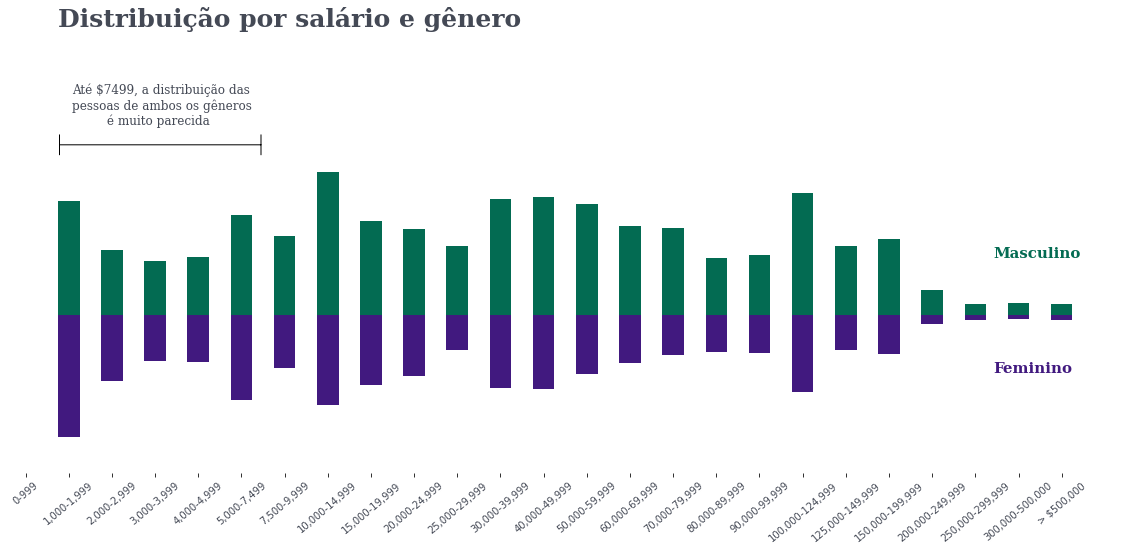

In [ ]:
#@title
# dados
order_dict = {'0-999':0,'1,000-1,999':1, '2,000-2,999':2, '3,000-3,999':3, '4,000-4,999':4,
'5,000-7,499':5, '7,500-9,999':6, '10,000-14,999':7, '15,000-19,999':8, 
'20,000-24,999':9, '25,000-29,999':10, '30,000-39,999':11, '40,000-49,999':12,
'50,000-59,999':13, '60,000-69,999':14, '70,000-79,999':15, '80,000-89,999':16,
'90,000-99,999':17, '100,000-124,999':18, '125,000-149,999':19, '150,000-199,999':20,
'200,000-249,999':21, '250,000-299,999':22, '300,000-500,000':23, '> $500,000':23}

income_gender = df.groupby('Q24')['Q2'].value_counts().unstack().sort_index().fillna(0).astype(int) 
income_gender = pd.DataFrame(income_gender, index=sorted(order_dict, key=order_dict.get))

man = income_gender['Man'] / len(df[df['Q2'] == 'Man']) * 100
woman = -income_gender['Woman'] / len(df[df['Q2'] == 'Woman']) * 100

# gráfico
fig, ax = plt.subplots(1,1, figsize=(20, 8))
ax.bar(man.index, man, width=0.5, label='Masculino',
       color=['#036b52'])
ax.bar(woman.index, woman, width=0.5, label='Feminino',
       color=['#41197f'])
    
# outras configurações do gráfico    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_ylim(-4, 7)    
ax.set_yticks([]) 
ax.set_xticklabels(income_gender.index, color='#444955', rotation=40)
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Distribuição por salário e gênero', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
fig.text(0.81,0.5,"Masculino", fontweight="bold", fontfamily='serif', fontsize=15, color='#036b52')
fig.text(0.81,0.3,"Feminino", fontweight="bold", fontfamily='serif', fontsize=15, color='#41197f')
fig.text(0.17,0.73,"Até $7499, a distribuição das \npessoas de ambos os gêneros \n         é muito parecida", fontweight="light", fontfamily='serif', fontsize=12, color='#444955')
ax.annotate('', xy=(0.74, 4.3), xytext=(5.5, 4.3), arrowprops={'arrowstyle': '|-|'}, color='#444955')

# plotando o gráfico
plt.show()

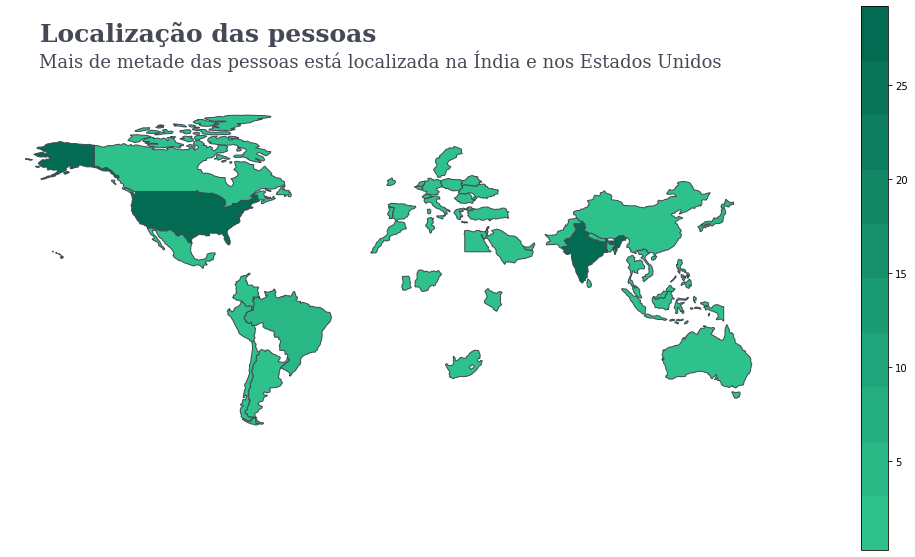

In [ ]:
#@title
# função para converter o nome dos países em código com 2 letras
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# criando uma coluna com o código dos países
df['country_code'] = alpha3code(df['Q3'])
df['country_code'] = df['country_code'].str.replace('None', 'USA')

# 'naturalearth_lowres' é um dataset da biblioteca geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# vamos renomear as colunas do dataset para unir com o nosso df
world.columns=['pop_est', 'continent', 'country_name', 'country_code', 'gdp_md_est', 'geometry']

# vamos criar um dataset com a quantidade de pessoas em cada país
df_countries = df['country_code'].value_counts().rename_axis('country_code').reset_index(name='counts') 
df_countries = pd.DataFrame(df_countries)
df_countries['percentage'] = df_countries['counts'] / df['country_code'].value_counts().sum() * 100

# vamos unir os datasets
df_world = pd.merge(world, df_countries, on='country_code')

# definindo o cmap
myColors = ['#2fc18c','#036B52']
cmap = LinearSegmentedColormap.from_list('Custom', myColors, 10)

# gráfico
geoplot.choropleth(df_world, figsize=(18, 10), hue='percentage', 
                   cmap=cmap, legend=True, edgecolor='#444955')
plt.title('Localização das pessoas',  x=0.25, y=1.15, fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
plt.suptitle('Mais de metade das pessoas está localizada na Índia e nos Estados Unidos',  x=0.413, y=0.82, fontsize=18, fontweight='light', fontfamily='serif', color='#444955')


# plotando o gráfico
plt.show()

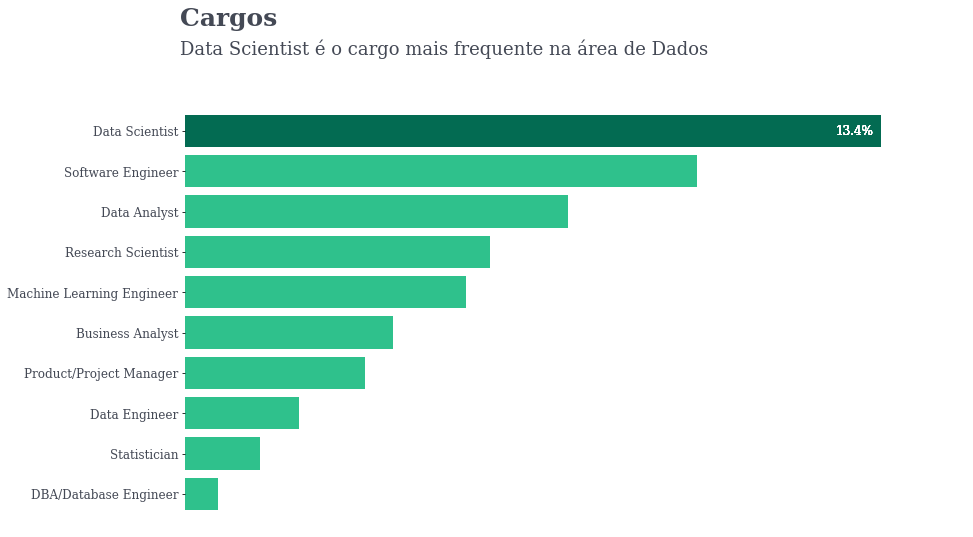

In [ ]:
#@title
# dados
order_dict = {'Data Scientist':0, 'Software Engineer':1,
              'Data Analyst':2, 'Research Scientist':3,
              'Machine Learning Engineer':4, 'Business Analyst':5,
              'Product/Project Manager':6, 'Data Engineer':7,
              'Statistician':8,'DBA/Database Engineer':9}

position = df['Q5'].value_counts() / len(df) * 100
position = pd.DataFrame(position, index=sorted(order_dict, key=order_dict.get, reverse=True))

# gráfico
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(position.index, position['Q5'], color=['#2fc18c','#2fc18c','#2fc18c','#2fc18c','#2fc18c',
                                               '#2fc18c','#2fc18c','#2fc18c','#2fc18c','#036B52'])

# anotações
for i in position.index:
    ax.annotate(f"{str(round(position['Q5'][9],1))+'%'}", 
                   xy=(position['Q5'][9] - 0.5, 9),
                   va = 'center', ha='center', fontweight='light', fontfamily='serif',
                   color='white', fontsize=12) 

# outras configurações do gráfico    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim(0, 15)  
ax.set_xticks([]) 
ax.set_yticklabels(labels=position.index, fontfamily='serif', fontsize=12, color='#444955')
fig.text(0.12, 1, 'Cargos', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
fig.text(0.12, 0.95, 'Data Scientist é o cargo mais frequente na área de Dados', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')

# plotando o gráfico
plt.show()

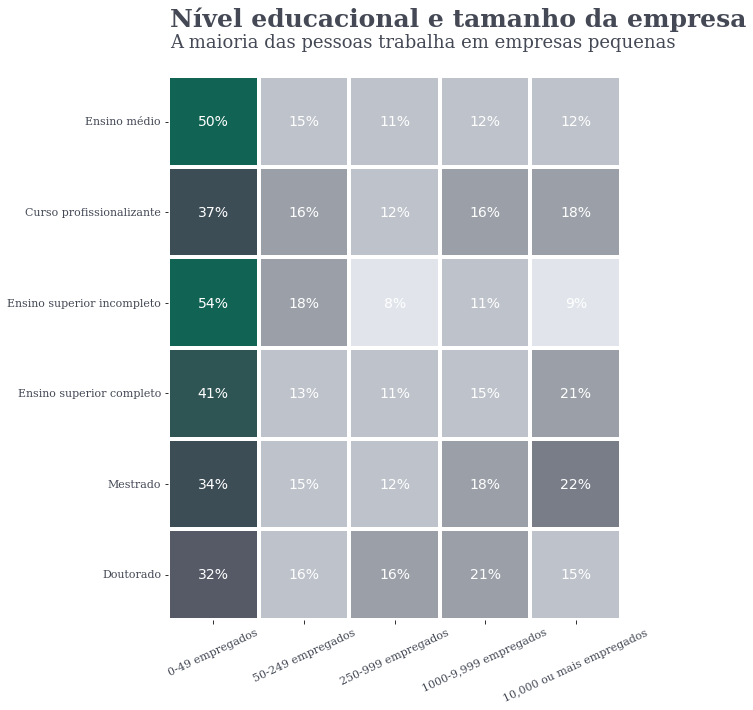

In [ ]:
#@title
# dados
company_size_order = ['0-49 employees','50-249 employees','250-999 employees', 
                      '1000-9,999 employees','10,000 or more employees']

education_company_size = pd.crosstab(df['Q4'], df['Q20'], normalize='index').loc[education_order, company_size_order]

# definindo o cmap
myColors = ['#e1e5eb', '#444955', '#036b52']
cmap = LinearSegmentedColormap.from_list('Custom', myColors,  10)

# gráfico
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data=education_company_size, linewidths=0.1, vmin=0.05, vmax=0.6,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=cmap,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={'fontsize':14, 'color':'white'})

# outras configurações do gráfico
plt.xlabel('')
plt.ylabel('')
labels = ['0-49 empregados','50-249 empregados','250-999 empregados', 
          '1000-9,999 empregados','10,000 ou mais empregados']
ax.set_xticklabels(labels=labels, rotation=25, fontfamily='serif', fontsize=11, color='#444955')
ax.set_yticklabels(['Ensino médio','Curso profissionalizante', 'Ensino superior incompleto',
                    'Ensino superior completo','Mestrado', 'Doutorado'], fontfamily='serif', fontsize=11, color='#444955')
fig.text(0.29, 0.95, 'Nível educacional e tamanho da empresa', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')
fig.text(0.29, 0.92, 'A maioria das pessoas trabalha em empresas pequenas', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')

# plotando o gráfico
plt.show()

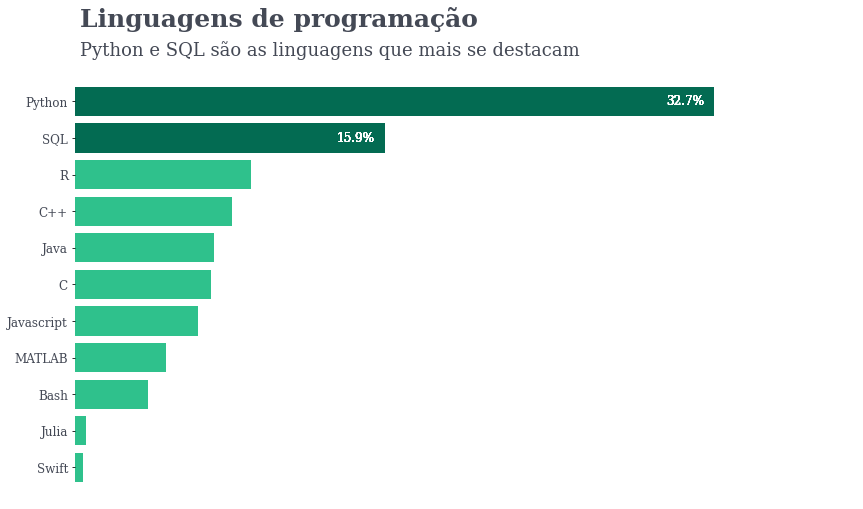

In [ ]:
#@title
# dados
labels = ['Swift','Julia', 'Bash','MATLAB', 'Javascript', 'C',
          'Java', 'C++', 'R', 'SQL', 'Python']
df_languages = df[[i for i in df.columns if 'Q7' in i]]
languages = pd.Series(dtype='int')
for i in df_languages.columns:
   languages[df_languages[i].value_counts().index[0]] = df_languages[i].count() 
languages = languages / languages.sum() * 100
languages = languages[labels].sort_values(ascending=True)

# gráfico
fig, ax = plt.subplots(1,1, figsize=(14, 8))
ax.barh(languages.index, languages, color=['#2fc18c','#2fc18c','#2fc18c','#2fc18c','#2fc18c',
                                           '#2fc18c','#2fc18c','#2fc18c','#2fc18c','#036B52','#036B52'])

# anotações
for i in languages.index:
    ax.annotate(f"{str(round(languages[10],1))+'%'}", 
                   xy=(languages[10] - 1.5, 10),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='white', fontsize=12)  
    
for i in languages.index:
    ax.annotate(f"{str(round(languages[9],1))+'%'}", 
                   xy=(languages[9] - 1.5, 9),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='white', fontsize=12)  

# outras configurações do gráfico
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xlim(0, 40)  
ax.set_xticks([]) 
ax.set_yticklabels(languages.index, fontfamily='serif', fontsize=12, color='#444955')     
fig.text(0.13, 0.95, 'Linguagens de programação', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')     
fig.text(0.13, 0.90, 'Python e SQL são as linguagens que mais se destacam', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')     


# plotando o gráfico
plt.show()

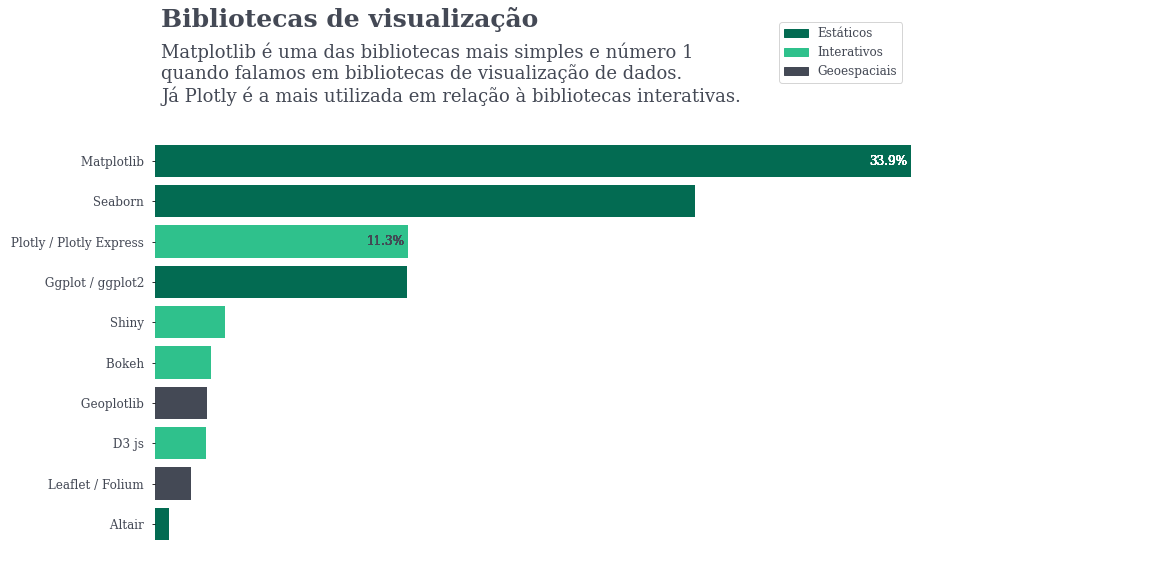

In [ ]:
#@title

# dados
labels =  [' Matplotlib ', ' Seaborn ', ' Plotly / Plotly Express ',
               ' Ggplot / ggplot2 ', ' Shiny ', ' Bokeh ', ' Geoplotlib ',
               ' D3 js ', ' Leaflet / Folium ',' Altair ']

df_visualization_tools = df[[i for i in df.columns if 'Q14' in i]]
visualization_tools = pd.Series(dtype='int')
for i in df_visualization_tools.columns:
    visualization_tools[df_visualization_tools[i].value_counts().index[0]] = df_visualization_tools[i].count() 
visualization_tools = visualization_tools / visualization_tools.sum() * 100
visualization_tools = visualization_tools[labels].sort_values(ascending=True)

# gráfico
fig, ax = plt.subplots(1,1, figsize=(18, 8))
ax.barh(visualization_tools.index, visualization_tools, 
       color=['#036b52', '#444955','#2fc18c','#444955','#2fc18c',
              '#2fc18c','#036b52','#2fc18c','#036b52','#036b52'])

# anotações
for i in visualization_tools.index:
    ax.annotate(f"{str(round(visualization_tools[9],1))+'%'}", 
                   xy=(visualization_tools[9] - 1, 9),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='white', fontsize=12)  
    
for i in visualization_tools.index:
    ax.annotate(f"{str(round(visualization_tools[7],1))+'%'}", 
                   xy=(visualization_tools[7] - 1, 7),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#444955', fontsize=12) 

# outras configurações do gráfico
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xlim(0, 45)  
ax.set_xticks([]) 
ax.set_yticklabels(visualization_tools.index, fontfamily='serif', fontsize=12, color='#444955')
fig.text(0.13, 1.05, 'Bibliotecas de visualização', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')    
fig.text(0.13, 0.92, 'Matplotlib é uma das bibliotecas mais simples e número 1\nquando falamos em bibliotecas de visualização de dados. \nJá Plotly é a mais utilizada em relação à bibliotecas interativas.', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')    
static = mpatches.Patch(color='#036b52', label='Estáticos')
interactive = mpatches.Patch(color='#2fc18c', label='Interativos')
geo = mpatches.Patch(color='#444955', label='Geoespaciais')
leg = plt.legend(handles=[static, interactive, geo], bbox_to_anchor=(0.75, 1.25), fontsize=12)
for text in leg.get_texts():
    plt.setp(text, color = '#444955', fontfamily ='serif')

# plotando o gráfico
plt.show()

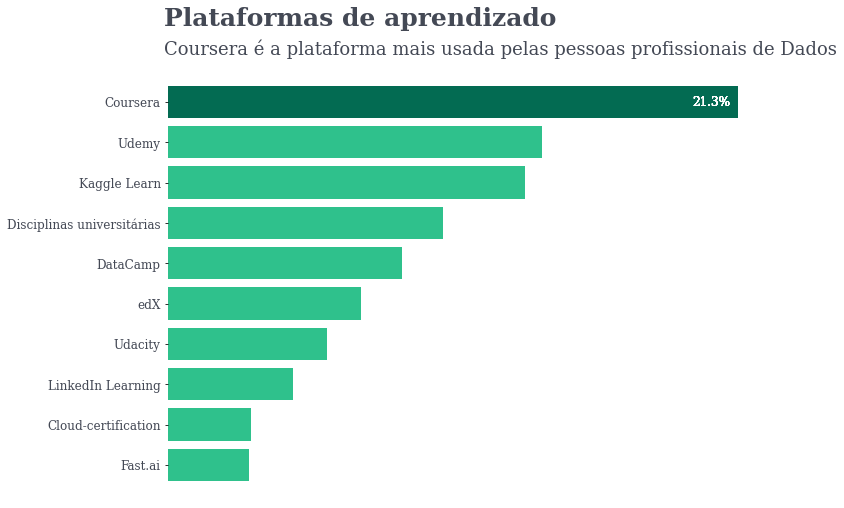

In [ ]:
#@title
# dados
labels = ['Coursera', 'Kaggle Learn Courses', 'Udemy',
       'University Courses (resulting in a university degree)', 'DataCamp',
       'edX', 'Udacity','LinkedIn Learning',
       'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
       'Fast.ai']
df_platforms = df[[i for i in df.columns if 'Q37' in i]]
platforms = pd.Series(dtype='int')
for i in df_platforms.columns:
   platforms[df_platforms[i].value_counts().index[0]] = df_platforms[i].count() 
platforms = platforms / platforms.sum() * 100
platforms = platforms[labels].sort_values(ascending=True)

# gráfico
fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax.barh(platforms.index, platforms, color=['#2fc18c','#2fc18c','#2fc18c','#2fc18c','#2fc18c',
                                           '#2fc18c','#2fc18c','#2fc18c','#2fc18c','#036B52'])

# anotações
for i in platforms.index:
    ax.annotate(f"{str(round(platforms[9],1))+'%'}", 
                   xy=(platforms[9] - 1, 9),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='white', fontsize=12)  

# outras configurações do gráfico
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xlim(0, 25)  
ax.set_xticks([]) 
labels = ['Fast.ai','Cloud-certification','LinkedIn Learning','Udacity','edX',
          'DataCamp', 'Disciplinas universitárias','Kaggle Learn','Udemy','Coursera']
ax.set_yticklabels(labels, fontfamily='serif', fontsize=12, color='#444955')
fig.text(0.12, 0.95, 'Plataformas de aprendizado', fontsize=25, fontweight='bold', fontfamily='serif', color='#444955')     
fig.text(0.12, 0.90, 'Coursera é a plataforma mais usada pelas pessoas profissionais de Dados', fontsize=18, fontweight='light', fontfamily='serif', color='#444955')     

# plotando o gráfico
plt.show()

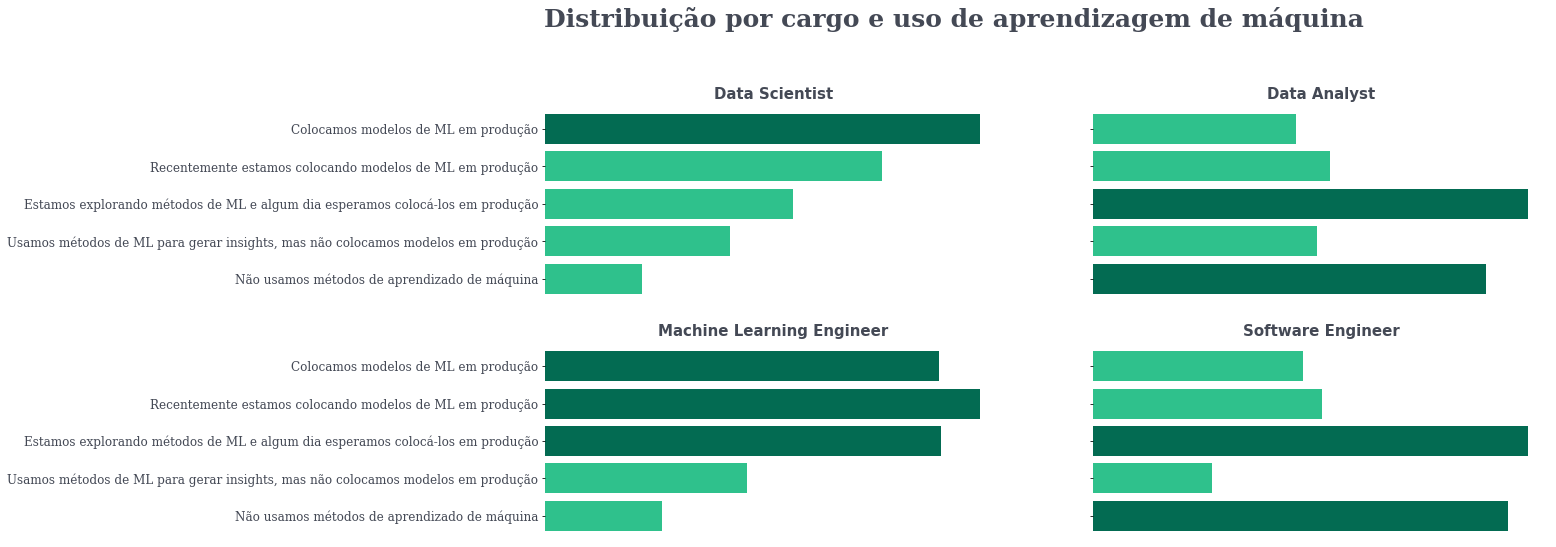

In [ ]:
#@title
# dados
order_dict = {'No (we do not use ML methods)':1,
              'We use ML methods for generating insights (but do not put working models into production)':2,
              'We are exploring ML methods (and may one day put a model into production)':3,
              'We recently started using ML methods (i.e., models in production for less than 2 years)':4,
              'We have well established ML methods (i.e., models in production for more than 2 years)':5}

ml_position = df.groupby('Q22')['Q5'].value_counts().unstack().sort_index().fillna(0).astype(int) 
ml_position = pd.DataFrame(ml_position, index=sorted(order_dict, key=order_dict.get))
for key, value in enumerate(ml_position):
  ml_position = ml_position / ml_position.sum() * 100

# gráfico
fig, ax = plt.subplots(2, 2, figsize=(18, 8), sharey=True)

positions = ['Data Scientist','Machine Learning Engineer','Data Analyst','Software Engineer']

ax[0][0].barh(ml_position['Data Scientist'].index, ml_position['Data Scientist'],
              color=['#2fc18c','#2fc18c','#2fc18c','#2fc18c','#036b52'])
ax[1][0].barh(ml_position['Machine Learning Engineer'].index, ml_position['Machine Learning Engineer'],
              color=['#2fc18c','#2fc18c','#036b52','#036b52','#036b52'])
ax[0][1].barh(ml_position['Data Analyst'].index, ml_position['Data Analyst'],
              color=['#036b52','#2fc18c','#036b52','#2fc18c','#2fc18c'])
ax[1][1].barh(ml_position['Software Engineer'].index, ml_position['Software Engineer'],
              color=['#036b52','#2fc18c','#036b52','#2fc18c','#2fc18c'])

# outras configurações do gráfico 
for key, value in enumerate(positions):
  ax[key%2][key//2].set_title(positions[key], fontweight='bold', fontsize=15, color='#444955')
  ax[key%2][key//2].set_xticks([]) 
  
  for s in ['top', 'left', 'right', 'bottom']:
      ax[key%2][key//2].spines[s].set_visible(False)
  
labels = ['Não usamos métodos de aprendizado de máquina',
          'Usamos métodos de ML para gerar insights, mas não colocamos modelos em produção',
          'Estamos explorando métodos de ML e algum dia esperamos colocá-los em produção',
          'Recentemente estamos colocando modelos de ML em produção',
          'Colocamos modelos de ML em produção']

ax[0][0].set_yticklabels(labels, fontfamily='serif', fontsize=12, color='#444955')
ax[1][0].set_yticklabels(labels, fontfamily='serif', fontsize=12, color='#444955')

fig.suptitle('Distribuição por cargo e uso de aprendizagem de máquina', fontsize=25,
             fontweight='bold', fontfamily='serif', x=0.44, y=1.05, color='#444955')

# plotando o gráfico
plt.show()